
- [ ] [Packages and data import](#import_package)
- [ ] [section 2 High level overview of columns](#high_level_overview_of_columns)
- [ ] [section 3 Identify missing data ](#identify-missing_Data)
- [ ] [section 4.A Handling missing Training data ](#handling-missing_Data)
- [ ] [section 4.B Handling missing Test data](#handling-missing_Data)
- [ ] [section 5 distributions examinination and description](#dist_exam_and_describe)
- [ ] [section 6 Save cleaned data frame to a file](#dist_exam_and_describe)
- [ ] [Section  - Refeneces](#References)
### Section 4B cleaning Test dataset<a id='cleaning_test_dataset'></a>


- [x]Are missing values imputed appropriately?
- [ ]Are distributions examined and described?
- [ ]Are outliers identified and addressed?
- [ ]Are appropriate summary statistics provided?
- [ ]Are steps taken during data cleaning and EDA framed appropriately?
- [ ]Does the student address whether or not they are likely to be able to answer their problem statement with the -provided data given what they've discovered during EDA?

<a id="import_package>
### Section 1: Packages and data import

<a id="high_level_overview_of_columns">
    
### Section 2: High level  overview of columns
A detailed dictionary can be found under the documents folder.Following tables provide a quick summary of data available.
There are 78 attributes of a house provided.

|Feature|Type|Description|
|---|---|---|
|state|object|SAT|
|Id|  |  | 
|PID|  |  | 
|MS SubClass|  |  Identifies the type of dwelling involved in the sale.| 
|MS Zoning|  | Identifies the general zoning classification of the sale | 
|Lot Frontage|  | Linear feet of street connected to property | 
|Lot Area|  |  Lot size in square feet|
|Street|  | Type of road access to property | 
|Alley|  | Type of alley access to property | 
|Lot Shape|  | General shape of property | 
|Land Contour|  | Flatness of the property | 
|Utilities|  |  Type of utilities available|
|Lot Config|  | Lot configuration | 
|Land Slope|  | Slope of property | 
|Neighborhood|  |Physical locations within Ames city limits  | 
|Condition 1|  | Proximity to various conditions |
|Condition 2|  | Proximity to various conditions (if more than one is present) | 
|Bldg Type|  |  Type of dwelling| '
|House Style|  | Style of dwelling | 
|Overall Qual|  | Rates the overall material and finish of the house |
|Overall Cond|  |Rates the overall condition of the house  | 
|Year Built|  | Original construction date | 
|Year Remod/Add|  | Remodel date (same as construction date if no remodeling or additions) | 
|Roof Style|  |  Type of roof|
|Roof Matl|  | Roof material | 
|Exterior 1st|  | Exterior covering on house | 
|Exterior 2nd|  | Exterior covering on house (if more than one material) | 
|Mas Vnr Type|  | Masonry veneer type |
|Mas Vnr Area|  | Masonry veneer area in square feet | 
|Exter Qual|  | Evaluates the quality of the material on the exterior | 
|Exter Cond|  | Evaluates the present condition of the material on the exterior | 
|Foundation|  | Type of foundation | 
|Bsmt Qual|  |  Evaluates the height of the basement|
|Bsmt Cond|  |  Evaluates the general condition of the basement| 
|Bsmt Exposure|  | Refers to walkout or garden level walls | 
|BsmtFin Type 1|  | Rating of basement finished area | 
|BsmtFin SF 1|  | Type 1 finished square feet |
|BsmtFin Type 2|  |Rating of basement finished area (if multiple types)  | 
|BsmtFin SF 2|  | Type 2 finished square feet | 
|Bsmt Unf SF|  | Unfinished square feet of basement area | 
|Total Bsmt SF|  |Total square feet of basement area  |
|Heating|  | Type of heating | 
|Heating QC|  | Heating quality and condition | 
|Central Air|  | Central air conditioning | 
|Electrical|  | Electrical system | 
|1st Flr SF|  |  First Floor square feet|
|2nd Flr SF|  | Second floor square feet | 
|Low Qual Fin SF|  | Low quality finished square feet (all floors) | 
|Gr Liv Area|  | Above grade (ground) living area square feet | 
|Bsmt Full Bath|  | Basement full bathrooms |
|Bsmt Half Bath|  | Basement half bathrooms | 
|Full Bath|  |  Full bathrooms above grade| 
|Half Bath|  |  Half baths above grade| 
|Bedroom AbvGr|  | Bedrooms above grade (does NOT include basement bedrooms) |
|Kitchen AbvGr|  | Kitchens above grade | 
|Kitchen Qual|  | Kitchen quality | 
|TotRms AbvGrd|  | Total rooms above grade (does not include bathrooms) | 
|Functional|  |  Home functionality (Assume typical unless deductions are warranted)|
|Fireplaces|  |  Number of fireplaces| 
|Fireplace Qu|  | Fireplace quality | 
|Garage Type|  | Garage location | 
|Garage Yr Blt|  | Year garage was built |
|Garage Finish|  | Interior finish of the garage | 
|Garage Cars|  | Size of garage in car capacity | 
|Garage Area|  | Size of garage in square feet | 
|Garage Qual|  | Garage quality |
|Garage Cond|  | Garage condition | 
|Paved Drive|  | Paved driveway | 
|Wood Deck SF|  | Wood deck area in square feet | 
|Open Porch SF|  | Open porch area in square feet |
|Enclosed Porch|  | Enclosed porch area in square feet | 
|3Ssn Porch|  | Three season porch area in square feet | 
|Screen Porch|  | Screen porch area in square feet | 
|Pool Area|  |  Pool area in square feet| 
|**Pool QC** | string | Pool quality |
|Fence|  | Fence quality | 
|Misc Feature|  | Miscellaneous feature not covered in other categories  | 
|Misc Val|  |  $Value of miscellaneous feature| 
|Mo Sold|  |  Month Sold (MM)| 
|Yr Sold|  |  Year Sold (YYYY)| 
|Sale Type|  | Type of sale |
|SalePrice|  |  Condition of sale|

In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from clean import DataCleaner;

In [59]:
train_df =pd.read_csv("../datasets/train.csv")
test_df =pd.read_csv("../datasets/test.csv")

train_ds_cleaner = DataCleaner(train_df)
test_ds_cleaner =DataCleaner(test_df)

train_df.shape ,test_df.shape

((2051, 81), (878, 80))

### Section 3 Identify missing data  <a id='identify-missing_Data'></a>

The  following query identifies the missing columns.
26 columns  out of 78 feature columns have atlease one more missing values.
 
###### Categorical columns with missing data  are as follows
Pool Q,
Fence,
Misc Feature
Alley',
Fireplace Qu, 
Mas Vnr Type', 
'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure','BsmtFin Type 1', 'BsmtFin Type 2', 
'Garage Type','Garage Finish', 'Garage Qual', 'Garage Cond', 

In [60]:
#train_df[train_ds_cleaner.missing_non_numerical_columns()].isnull().any() 
miss_nonnum_train_cols = ' '.join(train_ds_cleaner.missing_non_numerical_columns())
miss_nonnum_test_cols = ' '.join(test_ds_cleaner.missing_non_numerical_columns())
print( f'missing non-numerical columns\n training : \
      {miss_nonnum_train_cols}\n\n test:{miss_nonnum_test_cols}')

missing non-numerical columns
 training :       Alley Mas Vnr Type Bsmt Qual Bsmt Cond Bsmt Exposure BsmtFin Type 1 BsmtFin Type 2 Fireplace Qu Garage Type Garage Finish Garage Qual Garage Cond Pool QC Fence Misc Feature

 test:Alley Mas Vnr Type Bsmt Qual Bsmt Cond Bsmt Exposure BsmtFin Type 1 BsmtFin Type 2 Electrical Fireplace Qu Garage Type Garage Finish Garage Qual Garage Cond Pool QC Fence Misc Feature


In [61]:
sorted(train_df.select_dtypes(include ="number").columns)

['1st Flr SF',
 '2nd Flr SF',
 '3Ssn Porch',
 'Bedroom AbvGr',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Bsmt Unf SF',
 'BsmtFin SF 1',
 'BsmtFin SF 2',
 'Enclosed Porch',
 'Fireplaces',
 'Full Bath',
 'Garage Area',
 'Garage Cars',
 'Garage Yr Blt',
 'Gr Liv Area',
 'Half Bath',
 'Id',
 'Kitchen AbvGr',
 'Lot Area',
 'Lot Frontage',
 'Low Qual Fin SF',
 'MS SubClass',
 'Mas Vnr Area',
 'Misc Val',
 'Mo Sold',
 'Open Porch SF',
 'Overall Cond',
 'Overall Qual',
 'PID',
 'Pool Area',
 'SalePrice',
 'Screen Porch',
 'TotRms AbvGrd',
 'Total Bsmt SF',
 'Wood Deck SF',
 'Year Built',
 'Year Remod/Add',
 'Yr Sold']

######  Rename all Ordinal columns to begin with ord

In [62]:
train_ds_cleaner.prefix_ordinal_column_names()
test_ds_cleaner.prefix_ordinal_column_names()
test_df.columns[test_df.columns.str.startswith('ord')]

Index(['ord_Lot Shape', 'ord_Utilities', 'ord_Land Slope', 'ord_Overall Qual',
       'ord_Overall Cond', 'ord_Exter Qual', 'ord_Exter Cond', 'ord_Bsmt Qual',
       'ord_Bsmt Cond', 'ord_Bsmt Exposure', 'ord_BsmtFin Type 1',
       'ord_BsmtFin Type 2', 'ord_Heating QC', 'ord_Electrical',
       'ord_Kitchen Qual', 'ord_Functional', 'ord_Fireplace Qu',
       'ord_Garage Finish', 'ord_Garage Qual', 'ord_Garage Cond',
       'ord_Paved Drive', 'ord_Pool QC', 'ord_Fence'],
      dtype='object')

###### Numerical columns with missing data
Lot Frontage', 'Mas Vnr Area',
'BsmtFin SF 1', 'BsmtFin SF 2','Bsmt Unf SF', 'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath',
'Garage Yr Blt', 'Garage Cars', 'Garage Area'

In [63]:
#train_df[train_df.columns[train_df.isnull().any()]].select_dtypes(include ="number").columns
missing_num_train_cols = ' '.join(train_ds_cleaner.missing_numerical_columns())
missing_num_test_cols = ' '.join(test_ds_cleaner.missing_numerical_columns())
print( f'missing numerical columns\n training : \
      {missing_num_train_cols}\n\n test:{missing_num_test_cols}')

missing numerical columns
 training :       Lot Frontage Mas Vnr Area BsmtFin SF 1 BsmtFin SF 2 Bsmt Unf SF Total Bsmt SF Bsmt Full Bath Bsmt Half Bath Garage Yr Blt Garage Cars Garage Area

 test:Lot Frontage Mas Vnr Area Garage Yr Blt


###### Missing columns with highest to lowest in ratio

In [64]:
train_ds_cleaner.disp_missing_data()

ord_Pool QC           99.561190
Misc Feature          96.830814
Alley                 93.174061
ord_Fence             80.497318
ord_Fireplace Qu      48.756704
Lot Frontage          16.089712
Garage Yr Blt          5.558264
ord_Garage Cond        5.558264
ord_Garage Qual        5.558264
ord_Garage Finish      5.558264
Garage Type            5.509508
ord_Bsmt Exposure      2.827889
ord_BsmtFin Type 2     2.730375
ord_Bsmt Cond          2.681619
ord_Bsmt Qual          2.681619
ord_BsmtFin Type 1     2.681619
Mas Vnr Type           1.072647
Mas Vnr Area           1.072647
Bsmt Half Bath         0.097513
Bsmt Full Bath         0.097513
Garage Cars            0.048757
BsmtFin SF 1           0.048757
BsmtFin SF 2           0.048757
Bsmt Unf SF            0.048757
Garage Area            0.048757
Total Bsmt SF          0.048757
dtype: float64


### Section 4.A  Handling missing training data  <a id='handling-missing_Data'></a>
There are total 26 features that has missing atleast a value. Also , while most of the  columns have missing data less than 5  percent. There are 5 features where very high number of data is missing. Multiple stragtegies were  employed to impute or drop data and  we will disucss each column and the reasonings here .

###### 1. Pool  and Fireplace  , Garage and basement   attributes were set to 'NA' when the pool or fireplace , garage or basement itself didn't exist.


In [65]:
train_df =train_ds_cleaner.Replace_pool_quality_as_na_if_no_pool()
train_df =train_ds_cleaner.Replace_fireplace_quality_as_na_if_no_fireplace()
train_df =train_ds_cleaner.Replace_garage_attributes_as_na_if_no_garage()
train_df =train_ds_cleaner.Replace_basement_attributes_as_na_if_no_basement()

###### 2. columns 'Misc Feature' and  'Alley'  and 'Fence' attributes set to Na
With 96% and 93% and 80 % missing data for the three columns respectively .I decided to assign no 'NA' for houses that were missing this information .

In [66]:
train_df =train_ds_cleaner.Replace_misc_feature_as_na_if_null()
train_df =train_ds_cleaner.Replace_access_to_Alley_as_na_if_null()
train_df =train_ds_cleaner.Replace_fence_as_na_if_null()

###### 2. column  'Lot  frontage'  is  width of a lot, measured at the front part of the lot for a house.
It would make sense that lot width and lot area are co-related calculating area would depend on width.
Following scatter plot also demonstrates a positive , perhaps weak co-relation between the two.
So I decided to populate the lot frontage using the average lot frontage for houses that have similar area  ( with in +/- 5 percent threshold)

Text(0, 0.5, 'Lot frontage')

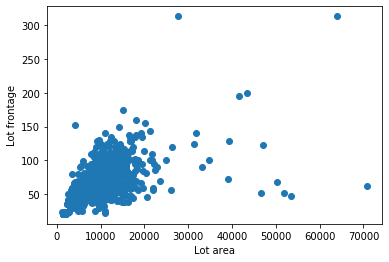

In [67]:
plt.scatter(train_df['Lot Area'],train_df['Lot Frontage'])
plt.xlabel("Lot area")
plt.ylabel("Lot frontage")

In [68]:
train_df =train_ds_cleaner.impute_lot_frontage_with_avg_of_similar_homes(5)

######  If to many columns are missing  drop the  rows al-together
My first attempt is to find is multiple columns are empty  and is so then dropping the row than tryign to fill all the values as  hence I am going to drop the following 2 rows.

In [69]:
train_df= train_df[~(train_df['ord_Bsmt Qual'].isnull() &
   train_df['ord_Bsmt Exposure'].isnull() &train_df['Bsmt Full Bath'].isnull() &
   train_df['ord_BsmtFin Type 1'].isnull() & train_df['ord_BsmtFin Type 2'].isnull() &
   train_df['ord_Bsmt Cond'].isnull() & train_df['Total Bsmt SF'].isnull() 
    )
  ]
train_df =train_df[~(train_df['ord_Garage Finish'].isnull() &
   train_df['Garage Cars'].isnull() &
   train_df['Garage Area'].isnull() &
   train_df['ord_Garage Qual'].isnull() &
   train_df['ord_Garage Cond'].isnull() )
  ]

######   opt in for most conservative option as  no option is  spcified on Masaonary venner type
For Masonry veneer type , among the  four options . None, Brkface,Stone,BrkCmn - I decided to opt for none as that was the most common choice among houses.
Choosing Masonry veneer type  to none will mean the area to be zero

In [70]:
train_df.loc[train_df['Mas Vnr Area'].isnull(),'Mas Vnr Area'] = 0
train_df.loc[train_df['Mas Vnr Type'].isnull(),'Mas Vnr Type'] = 'None'
train_df.loc[train_df['ord_Bsmt Exposure'].isnull(),'ord_Bsmt Exposure'] ='N_A'
train_df.loc[train_df['ord_BsmtFin Type 2'].isnull(),'ord_BsmtFin Type 2']  = train_df.loc[train_df['ord_BsmtFin Type 2'].isnull(),['ord_BsmtFin Type 1']]

######   Replacing these  missing data with  just  a value  without loosing data in  other columns for these row  model can work and we have all numbers,

In [71]:
train_df.dropna(inplace=True)
train_df.drop(columns=['PID','Id'],inplace=True)

### Section 4B cleaning Test dataset<a id='cleaning_test_dataset'></a>

In [72]:
test_ds_cleaner.disp_missing_data()

ord_Pool QC           99.544419
Misc Feature          95.330296
Alley                 93.394077
ord_Fence             80.410023
ord_Fireplace Qu      48.063781
Lot Frontage          18.223235
Garage Yr Blt          5.125285
ord_Garage Finish      5.125285
ord_Garage Qual        5.125285
ord_Garage Cond        5.125285
Garage Type            5.011390
ord_BsmtFin Type 2     2.847380
ord_BsmtFin Type 1     2.847380
ord_Bsmt Exposure      2.847380
ord_Bsmt Cond          2.847380
ord_Bsmt Qual          2.847380
Mas Vnr Area           0.113895
Mas Vnr Type           0.113895
ord_Electrical         0.113895
dtype: float64


In [73]:
test_df =test_ds_cleaner.Replace_pool_quality_as_na_if_no_pool()
test_df =test_ds_cleaner.Replace_misc_feature_as_na_if_null()
test_df =test_ds_cleaner.Replace_access_to_Alley_as_na_if_null()
test_df =test_ds_cleaner.Replace_fence_as_na_if_null()
test_df =test_ds_cleaner.Replace_fireplace_quality_as_na_if_no_fireplace()
test_df =test_ds_cleaner.Replace_garage_attributes_as_na_if_no_garage()
test_df =test_ds_cleaner.Replace_basement_attributes_as_na_if_no_basement()
test_df.loc[test_df['Mas Vnr Area'].isnull(),'Mas Vnr Area'] = 0
test_df.loc[test_df['Mas Vnr Type'].isnull(),'Mas Vnr Type'] = 'None'
test_df.loc[test_df['ord_Bsmt Exposure'].isnull(),'ord_Bsmt Exposure'] ='N_A'
test_df.loc[test_df['ord_Garage Finish'].isnull(),'ord_Garage Finish'] ='N_A'

test_df.loc[test_df['ord_Electrical'].isnull(),'ord_Electrical']='SBrkr'  # most common electrical
test_df.loc[test_df['Garage Yr Blt'].isnull(),['ord_Garage Finish','ord_Garage Qual','ord_Garage Finish']] ='N_A'
test_df.loc[test_df['ord_Garage Cond'].isnull(),'ord_Garage Cond'] ='N_A'

test_df =test_ds_cleaner.impute_lot_frontage_with_avg_of_similar_homes(5)
test_df =test_ds_cleaner.impute_lot_frontage_with_avg_of_similar_homes(10)
test_df =test_ds_cleaner.impute_lot_frontage_with_avg_of_similar_homes(20)
test_df =test_ds_cleaner.impute_lot_frontage_with_avg_of_similar_homes(40)

### Section 5 Distribution examination and description<a id='dist_exam_and_describe'></a>

In [74]:
###### Distribution for Numerical (discrete and continuous) variables

In [75]:
size_cols =['Lot Area','BsmtFin SF 1','BsmtFin SF 2','Bsmt Unf SF','Total Bsmt SF','1st Flr SF','2nd Flr SF']
bsmt_cols =['Kitchen AbvGr','Full Bath','Half Bath','Bedroom AbvGr']
garage_cols =['Garage Type','Garage Yr Blt','Garage Area','Garage Cars','ord_Garage Cond','ord_Garage Finish','ord_Garage Qual','ord_Garage Finish']
built_date =['Garage Yr Blt','Yr Sold','Mo Sold','Year Built','Year Remod/Add']

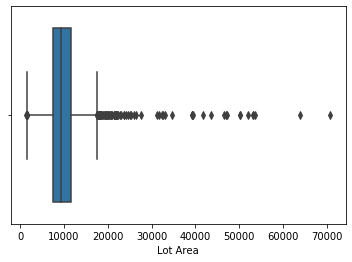

In [76]:
sns.boxplot(x=train_df['Lot Area'])

In [77]:
train_df['SalePrice'].describe()


count      2045.000000
mean     181389.461614
std       79232.783801
min       12789.000000
25%      129800.000000
50%      162500.000000
75%      214000.000000
max      611657.000000
Name: SalePrice, dtype: float64

In [78]:
train_df[train_df['Garage Yr Blt']>= 2020][built_date]
train_df= train_df[~(train_df['Garage Yr Blt']>= 2020)]

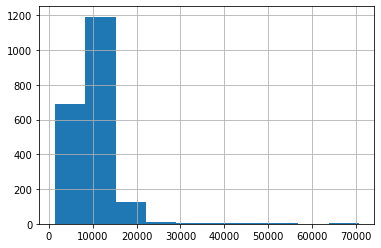

In [79]:
train_df['Lot Area'].hist()

In [80]:
train_df[train_df['Lot Area']>= 60000]['SalePrice']

960     160000
1854    280000
Name: SalePrice, dtype: int64

In [81]:
train_df[train_df['Garage Yr Blt']==train_df['Garage Yr Blt'].max()][size_cols]


,Lot Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF
144,12853,1032.0,0.0,610.0,1642.0,1418,0
1241,9803,0.0,0.0,1214.0,1214.0,1214,0


In [82]:
train_df[garage_cols].agg(['count','min','max','mean']).T

,count,min,max,mean
Garage Type,2044,2Types,N_A,NaN
Garage Yr Blt,2044,0,2010,1869.23
Garage Area,2044,0,1418,473.417
Garage Cars,2044,0,5,1.77593
ord_Garage Cond,2044,Ex,TA,NaN
ord_Garage Finish,2044,Fin,Unf,NaN
ord_Garage Qual,2044,Ex,TA,NaN
ord_Garage Finish,2044,Fin,Unf,NaN


In [83]:
train_df[sorted(train_df.select_dtypes(include="number").columns)].agg(['count','min','max','mean']).T


,count,min,max,mean
1st Flr SF,2044.0,334.0,5095.0,1163.590509
2nd Flr SF,2044.0,0.0,1862.0,329.681018
3Ssn Porch,2044.0,0.0,508.0,2.600294
Bedroom AbvGr,2044.0,0.0,8.0,2.843933
Bsmt Full Bath,2044.0,0.0,3.0,0.427104
Bsmt Half Bath,2044.0,0.0,2.0,0.063112
Bsmt Unf SF,2044.0,0.0,2336.0,567.385029
BsmtFin SF 1,2044.0,0.0,5644.0,441.385519
BsmtFin SF 2,2044.0,0.0,1474.0,47.702055
Enclosed Porch,2044.0,0.0,432.0,22.521037


In [84]:
###### Distribution for Ordinal variables
#

for col in test_df.columns[test_df.columns.str.startswith('ord')]:
    print(f"{col}:\n{train_df[col].value_counts()}")
    print(f"---------------------------------")
                           

ord_Lot Shape:
Reg    1294
IR1     688
IR2      53
IR3       9
Name: ord_Lot Shape, dtype: int64
---------------------------------
ord_Utilities:
AllPub    2042
NoSeWa       1
NoSewr       1
Name: ord_Utilities, dtype: int64
---------------------------------
ord_Land Slope:
Gtl    1949
Mod      88
Sev       7
Name: ord_Land Slope, dtype: int64
---------------------------------
ord_Overall Qual:
5     561
6     505
7     430
8     248
4     158
9      77
3      29
10     23
2       9
1       4
Name: ord_Overall Qual, dtype: int64
---------------------------------
ord_Overall Cond:
5    1164
6     367
7     268
8     101
4      70
3      35
9      29
2       6
1       4
Name: ord_Overall Cond, dtype: int64
---------------------------------
ord_Exter Qual:
TA    1243
Gd     694
Ex      81
Fa      26
Name: ord_Exter Qual, dtype: int64
---------------------------------
ord_Exter Cond:
TA    1771
Gd     215
Fa      49
Ex       7
Po       2
Name: ord_Exter Cond, dtype: int64
-----------------

In [85]:
train_df[train_df['1st Flr SF'] >4500]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,ord_Lot Shape,Land Contour,ord_Utilities,Lot Config,...,Screen Porch,Pool Area,ord_Pool QC,ord_Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
960,60,RL,313.0,63887,Pave,N_A,IR3,Bnk,AllPub,Corner,...,0,480,Gd,N_A,N_A,0,1,2008,New,160000
1885,20,RL,128.0,39290,Pave,N_A,IR1,Bnk,AllPub,Inside,...,0,0,N_A,N_A,Elev,17000,10,2007,New,183850


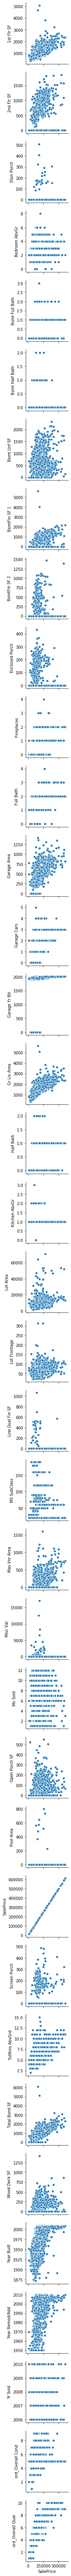

In [86]:
sns.pairplot(train_df,x_vars =['SalePrice'],y_vars =sorted(train_df.select_dtypes(include ="number").columns))

In [87]:
###### Are outliers identified and addressed?


In [88]:
from scipy import stats
#train_df[(np.abs(stats.zscore(train_df)) < 3).all(axis=1)]
#train_df[np.abs(stats.zscore(train_df[sorted(train_df.select_dtypes(include ="number").columns)]))  <3]

train_df[np.abs(stats.zscore(train_df['SalePrice']))  >3]


,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,ord_Lot Shape,Land Contour,ord_Utilities,Lot Config,...,Screen Porch,Pool Area,ord_Pool QC,ord_Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
41,20,RL,107.000000,13891,Pave,N_A,Reg,Lvl,AllPub,Inside,...,0,0,N_A,N_A,N_A,0,9,2006,New,465000
81,20,RL,63.000000,17423,Pave,N_A,IR1,Lvl,AllPub,CulDSac,...,0,0,N_A,N_A,N_A,0,7,2009,New,501837
138,60,RL,60.000000,18062,Pave,N_A,IR1,HLS,AllPub,CulDSac,...,0,0,N_A,N_A,N_A,0,9,2006,New,545224
151,60,RL,85.000000,16056,Pave,N_A,IR1,Lvl,AllPub,Inside,...,0,0,N_A,N_A,N_A,0,7,2006,New,556581
190,60,RL,59.000000,16023,Pave,N_A,IR1,HLS,AllPub,CulDSac,...,0,0,N_A,N_A,N_A,0,3,2006,New,457347
328,20,RL,80.280702,12692,Pave,N_A,IR1,Lvl,AllPub,Inside,...,0,0,N_A,N_A,N_A,0,5,2007,WD,430000
332,60,RL,96.000000,12539,Pave,N_A,Reg,Lvl,AllPub,Inside,...,192,0,N_A,N_A,N_A,0,6,2008,WD,460000
480,20,RL,85.000000,14082,Pave,N_A,IR1,HLS,AllPub,Inside,...,0,0,N_A,N_A,N_A,0,1,2007,WD,441929
489,60,RL,130.000000,16900,Pave,N_A,Reg,Lvl,AllPub,Inside,...,0,0,N_A,N_A,N_A,0,1,2008,WD,421250
509,60,RL,67.000000,14948,Pave,N_A,IR1,Lvl,AllPub,Inside,...,0,0,N_A,N_A,N_A,0,11,2008,New,446261


In [89]:
###### Are appropriate summary statistics provided?

In [90]:
def create_new_features(df):
    
   df['feature_tot_squ_feet'] = df['Total Bsmt SF']+df['1st Flr SF']+df['2nd Flr SF']
   df['f_has_pool']=df['Pool Area'].apply(lambda x :1 if(x >0) else 0)
   df['f_has_wooden_deck'] = df['Wood Deck SF'].apply(lambda x :1 if(x >0) else 0)

   df['f_has_enclosed_porch']=df['Enclosed Porch'].apply(lambda x :1 if(x >0) else 0)
   df['f_has_open_porch']=df['Open Porch SF'].apply(lambda x :1 if(x >0) else 0)
   df['f_has_screen_porch']=df['Screen Porch'].apply(lambda x :1 if(x >0) else 0)
   df['f_has_3Ssn_porch']=df['3Ssn Porch'].apply(lambda x :1 if(x >0) else 0)
   df['f_tot_porches']=df['f_has_enclosed_porch']

   affluent_neighborhoods =['Somerst','StoneBr','NridgHt','Veenker','NoRidge','GrnHill']
   df['f_in_affluent_neighborhood'] = df['Neighborhood'].apply(lambda x:  1 if (x in affluent_neighborhoods) else 0)

   df['f_new_or_remodeled'] = np.where((df['Year Built'] >1990) | (df['Year Remod/Add'] >1990), 1,0)

create_new_features(train_df)
create_new_features(test_df)

### Section 6 Save cleaned data frame  to a file> <a id= 'save_cleaned_dataframe'></a>

In [91]:
train_df.to_csv("./submission/train_cleaned.csv",index=False)
test_df.to_csv("./submission/test_cleaned.csv",index=False)

<a id='References'/>

###### References

 General assembly . - EDA Walkthrough  Notebook
 
 https://www.gimme-shelter.com/frontage-50043/ : width at the front is also known as frontage
 
 https://medium.com/@george.drakos62/handling-missing-values-in-machine-learning-part-1-dda69d4f88ca?
 
https://sebastianraschka.com/Articles/2014_ipython_internal_links.html

 https://stackoverflow.com/questions/37366717/pandas-print-column-name-with-missing-values